## Data loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data_2020 = pd.read_csv('mhcld_puf_2020.csv')
data_2021 = pd.read_csv('mhcld_puf_2021.csv')
data_2022 = pd.read_csv('mhcld_puf_2022 2.csv')
# it takes time, approximately 15 seconds

## Data Preparing

In [3]:
selected_columns = [
    "AGE", "EDUC", "ETHNIC", "RACE", "GENDER", "SPHSERVICE", "CMPSERVICE", 
    "OPISERVICE", "RTCSERVICE", "IJSSERVICE", "SUB", "MARSTAT", "SMISED", 
    "SAP", "NUMMHS", "EMPLOY", "DETNLF", "VETERAN", "LIVARAG", "TRAUSTREFLG", "ANXIETYFLG", 
    "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG", "BIPOLARFLG", "DEPRESSFLG", 
    "ODDFLG", "PDDFLG", "PERSONFLG", "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", 
    "STATEFIP", "DIVISION", "REGION"
]
# Data Cleaning
filtered_data_2020 = data_2020[selected_columns]
valid_data_2020 = filtered_data_2020[(filtered_data_2020 != -9).all(axis=1)]

filtered_data_2021 = data_2021[selected_columns]
valid_data_2021 = filtered_data_2021[(filtered_data_2021 != -9).all(axis=1)]

filtered_data_2022 = data_2022[selected_columns]
valid_data_2022 = filtered_data_2022[(filtered_data_2022 != -9).all(axis=1)]

In [4]:
# Data Merging and Index Reset
# combined_data = pd.concat([valid_data_2020, valid_data_2021, valid_data_2022], axis=0).reset_index(drop=True)
combined_data = pd.concat([valid_data_2020, valid_data_2021, valid_data_2022], axis=0).drop_duplicates().reset_index(drop=True)

# Randomize data
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# splitting
train_size = int(0.5 * len(combined_data))  # 50% to be training data
val_size = int(0.3 * len(combined_data))    # 30% to be validation data

train_data = combined_data.iloc[:train_size]
validation_data = combined_data.iloc[train_size:train_size + val_size]
test_data = combined_data.iloc[train_size + val_size:]

print(f"Combined training data size: {len(combined_data)} rows")
print(f"Training data size: {len(train_data)} rows")
print(f"Validation data size: {len(validation_data)} rows")
print(f"Test data size: {len(test_data)} rows")


Combined training data size: 141680 rows
Training data size: 70840 rows
Validation data size: 42504 rows
Test data size: 28336 rows


In [5]:
# Check for duplicate rows between train, validation, and test sets
duplicate_train_val = pd.merge(train_data, validation_data, how='inner')
duplicate_train_test = pd.merge(train_data, test_data, how='inner')
duplicate_val_test = pd.merge(validation_data, test_data, how='inner')

print("Duplicate rows between train and validation:", len(duplicate_train_val))
print("Duplicate rows between train and test:", len(duplicate_train_test))
print("Duplicate rows between validation and test:", len(duplicate_val_test))


Duplicate rows between train and validation: 0
Duplicate rows between train and test: 0
Duplicate rows between validation and test: 0


In [6]:
# Data Mapping
mapping_dict = {
    # Personal Characteristics
    'AGE': {1: '0-11 years', 2: '12-14 years', 3: '15-17 years', 4: '18-20 years', 5: '21-24 years', 6: '25-29 years', 7: '30-34 years', 8: '35-39 years', 9: '40-44 years', 10: '45-49 years', 11: '50-54 years', 12: '55-59 years', 13: '60-64 years', 14: '65 years and older'},
    'GENDER': {1: 'Male', 2: 'Female'},
    'RACE': {1: 'American Indian/Alaska Native', 2: 'Asian', 3: 'Black or African American', 4: 'Native Hawaiian or Other Pacific Islander', 5: 'White', 6: 'Some other race alone/two or more races'},    'ETHNIC': {1: 'Hispanic or Latino', 2: 'Not Hispanic or Latino'},
    'ETHNIC': {1: 'Mexican', 2: 'Puerto Rican', 3: 'Other Hispanic or Latino origin', 4: 'Not of Hispanic or Latino origin'},
    'EDUC': {1: 'Special education', 2: '0 to 8', 3: '9 to 11', 4: '12 (or GED)', 5: 'More than 12'},
    'VETERAN': {1: 'Yes', 2: 'No'},

    # Treatment Services and Institutions
    'SPHSERVICE': {1: 'Yes', 2: 'No'},
    'CMPSERVICE': {1: 'Yes', 2: 'No'},
    'OPISERVICE': {1: 'Yes', 2: 'No'},
    'RTCSERVICE': {1: 'Yes', 2: 'No'},
    'IJSSERVICE': {1: 'Yes', 2: 'No'},

    # Mental Health and Diagnosis
    'SMISED': {1: 'SMI', 2: 'SED and/or at risk for SED', 3: 'Not SMI/SED'},
    'SAP': {1: 'Yes', 2: 'No'},
    'SUB': {1: 'Alcohol-induced disorder', 2: 'Alcohol intoxication', 3: 'Substance-induced disorder', 4: 'Alcohol dependence', 5: 'Cocaine dependence', 6: 'Cannabis dependence', 7: 'Opioid dependence', 8: 'Other substance dependence', 9: 'Alcohol abuse', 10: 'Cocaine abuse', 11: 'Cannabis abuse', 12: 'Opioid abuse', 13: 'Other substance related conditions'},
    'MARSTAT': {1: 'Never married', 2: 'Now married', 3: 'Separated', 4: 'Divorced, widowed'},
    'NUMMHS': {0: 'None', 1: 'One', 2: 'Two', 3: 'Three'},
    'TRAUSTREFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'ANXIETYFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'ADHDFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'CONDUCTFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'DELIRDEMFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'BIPOLARFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'DEPRESSFLG': {0: 'Disorder not reported', 1: 'Disorder reported'}, ### target y
    'ODDFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'PDDFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'PERSONFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'SCHIZOFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'ALCSUBFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'OTHERDISFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},

    # Socioeconomic and Living Conditions
    'EMPLOY': {1: 'Full-time', 2: 'Part-time', 3: 'Employed full-time/part-time not differentiated', 4: 'Unemployed', 5: 'Not in labor force'},
    'DETNLF': {1: 'Retired, disabled', 2: 'Student', 3: 'Homemaker', 4: 'Sheltered/non-competitive employment', 5: 'Other'},
    'LIVARAG': {1: 'Experiencing Homelessness', 2: 'Private residence', 3: 'Other'},

    # Regional Information
    'STATEFIP': {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 
                9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 
                16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 
                22: 'Louisiana', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 
                28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 
                33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 
                38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 
                45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 
                50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 
                56: 'Wyoming', 72: 'Puerto Rico', 99: 'Other jurisdictions'},
    'DIVISION': {0: 'Other jurisdictions', 1: 'New England', 2: 'Middle Atlantic', 3: 'East North Central', 4: 'West North Central', 
                 5: 'South Atlantic', 6: 'East South Central', 7: 'West South Central', 8: 'Mountain', 9: 'Pacific'},
    'REGION': {0: 'Other jurisdictions', 1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'},
}

In [7]:
def map_to_text(data, mapping_dict):
    for column, mapping in mapping_dict.items():
        if column in data.columns:
            data[column] = data[column].map(mapping)
    return data

In [8]:
train_data_text = map_to_text(train_data.copy(), mapping_dict)
validation_data_text = map_to_text(validation_data.copy(), mapping_dict)
test_data_text = map_to_text(test_data.copy(), mapping_dict)

In [9]:
# Data Preprocessing
# Variable Preprocessing-bianry
binary_columns = [
    'VETERAN', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE',
    'SAP', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 
    'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 
    'ALCSUBFLG', 'OTHERDISFLG'
]

for column in binary_columns:
    for data in [train_data_text, validation_data_text, test_data_text]:
        if column in data.columns:
            data[column] = data[column].apply(lambda x: 1 if 'Yes' in x or 'Disorder reported' in x else 0)

In [10]:
# Variable Preprocessing-numerical
num_columns = ['NUMMHS']

num_mappings = {
    'NUMMHS': {'None': 0, 'One': 1, 'Two': 2, 'Three': 3}
}

for column in num_columns:
    for data in [train_data_text, validation_data_text, test_data_text]:
        if column in data.columns:
            data[column] = data[column].map(num_mappings[column])

In [11]:
# Variable Preprocessing-categorical
all_columns = train_data_text.columns
remaining_columns = [col for col in all_columns if col not in num_columns + binary_columns]

for data in [train_data_text, validation_data_text, test_data_text]:
    data = pd.get_dummies(data, columns=remaining_columns, drop_first=True)

In [12]:
# Test the data
assert train_data_text.columns.equals(validation_data_text.columns)
assert train_data_text.columns.equals(test_data_text.columns)

In [13]:
# X and y split
y_train = train_data_text['DEPRESSFLG']
y_val = validation_data_text['DEPRESSFLG']
y_test = test_data_text['DEPRESSFLG']

X_train = train_data_text.drop(columns=['DEPRESSFLG'])
X_val = validation_data_text.drop(columns=['DEPRESSFLG'])
X_test = test_data_text.drop(columns=['DEPRESSFLG'])

In [14]:
# # index is not continuous because we only consider totally valid case, so we need to reset index
# y_train = y_train.reset_index(drop=True)
# y_val = y_val.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

# X_train = X_train.reset_index(drop=True)
# X_val = X_val.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)

In [15]:
# Check for duplicate rows between train, validation, and test sets
duplicate_train_val = pd.merge(train_data, validation_data, how='inner')
duplicate_train_test = pd.merge(train_data, test_data, how='inner')
duplicate_val_test = pd.merge(validation_data, test_data, how='inner')

print("Duplicate rows between train and validation:", len(duplicate_train_val))
print("Duplicate rows between train and test:", len(duplicate_train_test))
print("Duplicate rows between validation and test:", len(duplicate_val_test))


Duplicate rows between train and validation: 0
Duplicate rows between train and test: 0
Duplicate rows between validation and test: 0


In [16]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70840 entries, 0 to 70839
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AGE          70840 non-null  object
 1   EDUC         70840 non-null  object
 2   ETHNIC       70840 non-null  object
 3   RACE         70840 non-null  object
 4   GENDER       70840 non-null  object
 5   SPHSERVICE   70840 non-null  int64 
 6   CMPSERVICE   70840 non-null  int64 
 7   OPISERVICE   70840 non-null  int64 
 8   RTCSERVICE   70840 non-null  int64 
 9   IJSSERVICE   70840 non-null  int64 
 10  SUB          70840 non-null  object
 11  MARSTAT      70840 non-null  object
 12  SMISED       70840 non-null  object
 13  SAP          70840 non-null  int64 
 14  NUMMHS       70840 non-null  int64 
 15  EMPLOY       70840 non-null  object
 16  DETNLF       70840 non-null  object
 17  VETERAN      70840 non-null  int64 
 18  LIVARAG      70840 non-null  object
 19  TRAUSTREFLG  70840 non-nu

In [17]:
print(X_train.head())

           AGE          EDUC                            ETHNIC  \
0  25-29 years       9 to 11  Not of Hispanic or Latino origin   
1  35-39 years       9 to 11  Not of Hispanic or Latino origin   
2  40-44 years  More than 12  Not of Hispanic or Latino origin   
3  60-64 years  More than 12  Not of Hispanic or Latino origin   
4  35-39 years   12 (or GED)  Not of Hispanic or Latino origin   

                        RACE  GENDER  SPHSERVICE  CMPSERVICE  OPISERVICE  \
0                      White    Male           0           1           1   
1  Black or African American  Female           0           1           0   
2                      White  Female           1           1           0   
3                      White    Male           0           1           0   
4                      White    Male           0           1           0   

   RTCSERVICE  IJSSERVICE  ... BIPOLARFLG ODDFLG PDDFLG  PERSONFLG  SCHIZOFLG  \
0           0           0  ...          1      0      0          

## SVM without NUMMHS

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Combine all data for consistent label encoding
all_data = pd.concat([X_train, X_val, X_test])

# Ensure all categorical columns are of string type
categorical_columns = all_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    all_data[col] = all_data[col].astype(str)

# Label encoding for categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    all_data[col] = label_encoder.fit_transform(all_data[col])

# Split the data back into training, validation, and test sets
X_train = all_data.iloc[:len(X_train)]
X_val = all_data.iloc[len(X_train):len(X_train) + len(X_val)]
X_test = all_data.iloc[len(X_train) + len(X_val):]

# One-hot encoding for categorical variables if needed
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align test and validation sets with the training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Remove the NUMMHS variable from the training, validation, and test sets
X_train = X_train.drop(columns=['NUMMHS'], errors='ignore')
X_val = X_val.drop(columns=['NUMMHS'], errors='ignore')
X_test = X_test.drop(columns=['NUMMHS'], errors='ignore')

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = svm_model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[16089  2975]
 [ 2682  6590]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     19064
           1       0.69      0.71      0.70      9272

    accuracy                           0.80     28336
   macro avg       0.77      0.78      0.78     28336
weighted avg       0.80      0.80      0.80     28336


Accuracy Score:
0.8003599661208357


### Interpretation of Results:

#### Accuracy:
- The overall accuracy of the model is 0.80 (80%). This means that 80% of the predictions made by the model were correct across all classes.
##### Interpretation:
The model performs quite well with 80% accuracy overall.

- **Class 0 (negative class)** has a high precision (0.86), meaning the model is good at correctly identifying negatives.
- **Class 1 (positive class)** has a recall of 0.71, which indicates there are still missed positive cases.
- **The macro and weighted averages** show a balanced view of the model’s performance across classes, with the weighted average matching the overall accuracy.

#### Test Set Classification Report:
- **Precision:** Indicates how well the model is at identifying positives. For class 0, it is 0.86, meaning 86% of predicted positives were actually positive.
- **Recall (Sensitivity or True Positive Rate):** Shows the ability of the model to detect actual positives. For class 1, it is 0.71, meaning 71% of actual positives were detected.
- **F1-score:** A balance between precision and recall. It considers both false positives and false negatives.
- **Support:** The number of actual occurrences for each class in the dataset.
- **Macro Avg:** The average of precision, recall, and F1-score across all classes.
- **Weighted Avg:** Weighted average across classes to provide an overall model performance metric, considering class imbalance.

#### Confusion Matrix (Test Set)
True Positives (TP): 6590 — The model correctly predicted positive cases (class 1).
False Positives (FP): 2975 — The model incorrectly predicted positive when it was actually negative (class 0).
True Negatives (TN): 16089 — The model correctly predicted negative cases (class 0).
False Negatives (FN): 2682 — The model incorrectly predicted negative when it was actually positive (class 1).

### Feature Importance

In [22]:
# Retrieve feature coefficients for the linear SVM model
feature_importance = pd.Series(svm_model.coef_[0], index=X_train.columns)

# Sort features by their absolute importance in descending order
top_features = feature_importance.abs().sort_values(ascending=False).head(10)

# Display the top 10 features along with their importance scores
print("Top 10 Features (sorted by importance):")
print(top_features)


Top 10 Features (sorted by importance):
SCHIZOFLG      2.000091
BIPOLARFLG     2.000069
OTHERDISFLG    1.999922
CONDUCTFLG     1.999104
ODDFLG         1.000380
SMISED         0.999915
PDDFLG         0.000803
IJSSERVICE     0.000399
ADHDFLG        0.000144
ALCSUBFLG      0.000134
dtype: float64


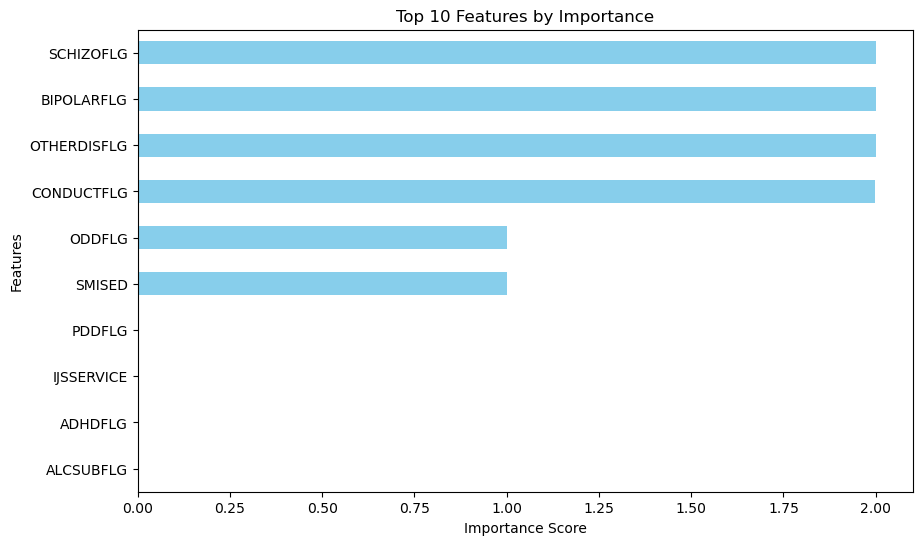

In [23]:
import matplotlib.pyplot as plt

# Plotting the top features
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

- Higher values of feature importance (e.g., SCHIZOFLG, BIPOLARFLG, OTHERDISFLG, CONDUCTFLG) highlight features with strong predictive power. These features are good indicators of the target class and should be monitored closely when interpreting the model’s predictions.
- Lower values (e.g., ADHDFLG, ALCSUBFLG) indicate features with minimal impact on the model’s decisions. While they might still contribute, their effect is less pronounced compared to higher-ranked features.